In [1]:
import pandas as pd


x1 = pd.read_excel("quiz4data.xlsx",sheet_name="x1")
x2 = pd.read_excel("quiz4data.xlsx",sheet_name="x2")


In [2]:
x1

,feat1,feat2,feat3,feat4
0,-10,10,2,4
1,-4,-1,2,-6
2,5,-8,2,-1
3,5,4,10,1
4,8,-7,9,-3
5,-2,-5,5,2


In [3]:
x2

,feat1,feat2,feat3,feat4
0,-6,8,-7,-4
1,-6,10,-7,-9
2,3,10,-2,-9
3,8,3,-6,-2
4,-4,-4,-10,-7
5,-9,-4,4,2


In [4]:
covMatrixX1 = pd.DataFrame.cov(x1)
covMatrixX2 = pd.DataFrame.cov(x2)
covMatrixX1X2 = covMatrixX1+covMatrixX2

import numpy as np

In [6]:
print(covMatrixX1)
print(covMatrixX2)
print(covMatrixX1X2)

           feat1      feat2  feat3  feat4
feat1  46.666667 -31.933333   16.8   -8.6
feat2 -31.933333  49.366667   -2.2   13.1
feat3  16.800000  -2.200000   13.6    0.4
feat4  -8.600000  13.100000    0.4   13.1
           feat1      feat2      feat3      feat4
feat1  41.866667  10.333333  -6.266667  -4.533333
feat2  10.333333  43.366667  -6.533333 -17.366667
feat3  -6.266667  -6.533333  24.666667  12.733333
feat4  -4.533333 -17.366667  12.733333  18.966667
           feat1      feat2      feat3      feat4
feat1  88.533333 -21.600000  10.533333 -13.133333
feat2 -21.600000  92.733333  -8.733333  -4.266667
feat3  10.533333  -8.733333  38.266667  13.133333
feat4 -13.133333  -4.266667  13.133333  32.066667


In [9]:
x1.mean() - x2.mean()

feat1    2.666667
feat2   -5.000000
feat3    9.666667
feat4    4.333333
dtype: float64

In [11]:
covarianceMAtrix = np.array([[2.66666667],[-5],[9.66666667],[4.33333333]]).dot(np.array([[[2.66666667,-5,9.66666667,4.33333333]]]))

Sbetween = np.array([covarianceMAtrix[0][0],covarianceMAtrix[1][0],covarianceMAtrix[2][0],covarianceMAtrix[3][0]])
print("between class covariance matrix")
print(Sbetween)


[[  7.11111113 -13.33333335  25.77777782  11.55555556]
 [-13.33333335  25.         -48.33333335 -21.66666665]
 [ 25.77777782 -48.33333335  93.44444451  41.88888887]
 [ 11.55555556 -21.66666665  41.88888887  18.77777775]]


In [13]:
CovMatrixSwSb = np.dot(np.linalg.inv(covMatrixX1X2) , Sbetween)
print("combined [[ Sw-1 * Sb ]] covariance matrix")
print(CovMatrixSwSb)

combined [[ Sw-1 * Sb ]] covariance matrix
[[ 6.82151637e-04 -1.27903432e-03  2.47279968e-03  1.10849641e-03]
 [-8.06323711e-02  1.51185696e-01 -2.92292345e-01 -1.31027603e-01]
 [ 6.22447989e-01 -1.16708998e+00  2.25637396e+00  1.01147798e+00]
 [ 9.49791927e-02 -1.78085986e-01  3.44299573e-01  1.54341188e-01]]


In [14]:
eigVal, eigVec = np.linalg.eig(CovMatrixSwSb)
print("eigenvalues")
print(eigVal)
print("eigenvectors")
print(eigVec)


eigenvalues
[ 0.00000000e+00  2.56258299e+00  6.68595512e-17 -9.20727801e-17]
eigenvectors
[[-0.9706468   0.0010746   0.51917922  0.46567359]
 [-0.0305498  -0.12702113  0.40297575  0.257066  ]
 [ 0.23583159  0.98054973  0.36164476 -0.3426333 ]
 [ 0.03598549  0.14962185 -0.66126889  0.77438208]]


In [15]:
W1 = eigVec[:,1]
print("get Vector of eigenvalue=2.5625")
print(W1)

get Vector of eigenvalue=2.5625
[ 0.0010746  -0.12702113  0.98054973  0.14962185]


In [16]:
allPoints = []
for i in range(0,6):
    print(x1.iloc[i].dot(W1))
    allPoints.append(x1.iloc[i].dot(W1))
for i in range(0,6):
    print(x2.iloc[i].dot(W1))
    allPoints.append(x2.iloc[i].dot(W1))

1.2786295157635172
1.1860910707003027
2.8330196968944152
9.452407645356688
9.273826785419415
5.834948839326796
-8.48495222833278
-9.487103766342212
-4.57468369059975
-6.55500869248174
-10.349064165951106
4.71985576110163


In [18]:
Y_labels = [0,0,0,0,0,0,1,1,1,1,1,1]

Text(0.5, 0, 'Linear Projection')

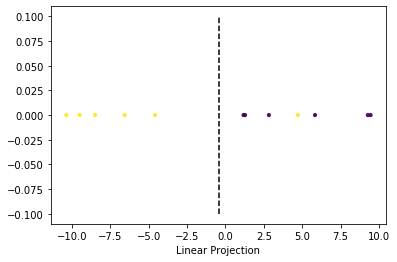

In [24]:
import matplotlib.pyplot as plt
plt.scatter(allPoints, np.zeros(12), alpha=0.9,
            s=10, c=Y_labels,)
plt.vlines(np.mean(allPoints), -0.1, 0.1, linestyles ="dashed", colors ="k")
plt.xlabel("Linear Projection")


<span style="color:black"> *!!!! The 2 class is not linarly seperable.* </span>

# SVM TEST ==>> FAİL

In [25]:
from sklearn.svm import SVC

clf = SVC(C=9999999,gamma='auto',kernel='linear')

Y = [0,0,0,0,0,0,1,1,1,1,1,1]
all_feat = pd.concat([x1,x2])
all_feat = all_feat.reset_index(drop=True)

X_train = np.array(all_feat)
Y_train = np.array(Y)

clf.fit(X_train,Y_train)


clf.predict(X_train)

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

<span style="color:black"> *The 2 class is  linarly seperable with SVM but it's not correct.* </span>

# LDA TEST 

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()

clf.fit(X_train,Y_train)

clf.predict(X_train)



array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])

<span style="color:black"> *!!!! The 2 class is not linarly seperable.* </span>